# Calculate Average Building Entry Loss (BEL) and Clutter Loss (Sect. 3-3 Earth-Space) according to ITU-R P.2109-1 and ITU-R P.2108-0

## License

```
Calculate Average Building Entry Loss (BEL) and Clutter Loss (Sect.
3-3 Earth-Space) according to ITU-R P.2109-1 and ITU-R P.2108-0.
Copyright (C) 2020+  Timo Jaeschke (timo.jaeschke@2pi-labs.com)

This program is free software; you can redistribute it and/or
modify it under the terms of the GNU General Public License
as published by the Free Software Foundation; either version 2
of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program; if not, write to the Free Software
Foundation, Inc., 51 Franklin Street, Fifth Floor, Boston, MA  02110-1301, USA.
```

### Python Implementation 
Import of necessary Python modules:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import math as math
import mpmath as mpmath
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import collections
from scipy.stats import norm
from scipy.stats import norm

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (14, 9),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

### BEL Calculation Model based on ITU Recommendation
The original model described in ITU-R P.2109-1 (valid up to 100 GHz) is used for BEL calculation.

In [3]:
# BEL model according to ITU-R P.2109-1 (valid up to 100 GHz) 
def calcBEL(ITU_Model, freq, elv_angle, prob):
    Lh=ITU_Model.r + ITU_Model.s * np.log10(freq)+ITU_Model.t*((np.log10(freq))**2)
    Le=0.212 * np.absolute(elv_angle)
    mu1=Lh + Le 
    mu2=ITU_Model.w + ITU_Model.x * np.log10(freq)
    sig1=ITU_Model.u+ ITU_Model.v * np.log10(freq) 
    sig2=ITU_Model.y+ ITU_Model.z * np.log10(freq)
    A=norm.ppf(prob,mu1,sig1)
    B=norm.ppf(prob,mu2,sig2)
    C=-3.0
    BEL=10*np.log10(10**(0.1*A)+10**(0.1*B)+10**(0.1*C))
    return BEL

### ITU BEL-Model Parameter
Define model parameter based on ITU-R P.2109-1 recommendation for omnidirectional TX antenna. 

In [4]:
# define model coefficients according to ITU-R P.2109-0

ITU_Model = collections.namedtuple('ITU_Model', 'name r s t u v w x y z')
print('Type of Models:', type(ITU_Model))

BEL_traditional = ITU_Model(name='Traditional', r=12.64, s=3.72, t=0.96, u=9.60, v=2.0, w=9.10, x=-3.0, y=4.5, z=-2.0)
BEL_therm_effic = ITU_Model(name='Therm. eff.', r=28.19, s=-3.0, t=8.48, u=13.5, v=3.8, w=27.8, x=-2.9, y=9.4, z=-2.1)
#BEL_traditional_ext = ITU_Model(name='Traditional ext.', r=12.64, s=3.72, t=0.96, u=9.60, v=2.0, w=9.10, x=-3.0, y=4.5, z=-1.8)   # Unagreed extrapolated model parameters to use the model above 100 GHz
#BEL_therm_effic_ext = ITU_Model(name='Therm. eff.ext.', r=28.19, s=-3.0, t=8.48, u=13.5, v=3.8, w=27.8, x=-2.9, y=9.4, z=-2.1)

print ('\nITU Model 1:',BEL_traditional)  
print ('\nITU Model 2:',BEL_therm_effic)  

Type of Models: <class 'type'>

ITU Model 1: ITU_Model(name='Traditional', r=12.64, s=3.72, t=0.96, u=9.6, v=2.0, w=9.1, x=-3.0, y=4.5, z=-2.0)

ITU Model 2: ITU_Model(name='Therm. eff.', r=28.19, s=-3.0, t=8.48, u=13.5, v=3.8, w=27.8, x=-2.9, y=9.4, z=-2.1)


### Clutter Loss Model based on ITU Recommendation
Function for earth space cluter loss according to R-REC-P.2108-0 section 3-3 (valid up to 100 GHz).

In [5]:
def calcClutterLoss(freq, elv_angle, prob):
    K=93*((freq)**0.175)
    A=0.05
    CL=((-1*K*(math.log(1-(prob)))/math.tan(A*(1-(elv_angle/90))+(math.pi*elv_angle/180)))**(0.5*(90-elv_angle)/90))-1-norm.ppf((1-prob),0,0.6)
    return CL

In [6]:
frequency = 100                       # Signal frequency in GHz
elv_angle = 0.52                         # Elevation angle of the path at the building facade (degree)
prob = 0.99                            # Probability that loss is not exceeded (0.0 < P < 1.0)

calcClutterLoss(frequency, elv_angle, prob)

124.50562228913128

### Average BEL and Clutter Loss for different elevation angles 

Losses in path between TX and victim RX: 
1. Building Entry loss avg. value (either traditional or energy efficient building type, both pathes calculated separately and added in the end with 70/30 percentage)
2. Clutter Loss (added to both pathes)
3. Correction to account for high gain antennas (Antenna HPBW predominantly <10°, according to P.2109-1) (added to both pathes)
4. Correction for polarization mismatch (3 dB in average, both stations lin. polarized) (added to both pathes)
5. Optional "lump sum" Avg. Model BEL correction to account for higher frequency range and deviations from model (added to both pathes)
6. Optional "lump sum" Avg. Reflection / Transmission loss correction to account for predominantly existing target in main beam (added to both pathes)
7. Optional "lump sum" Avg. Device shielding to account for predominantly self-shielded devices (added to both pathes)

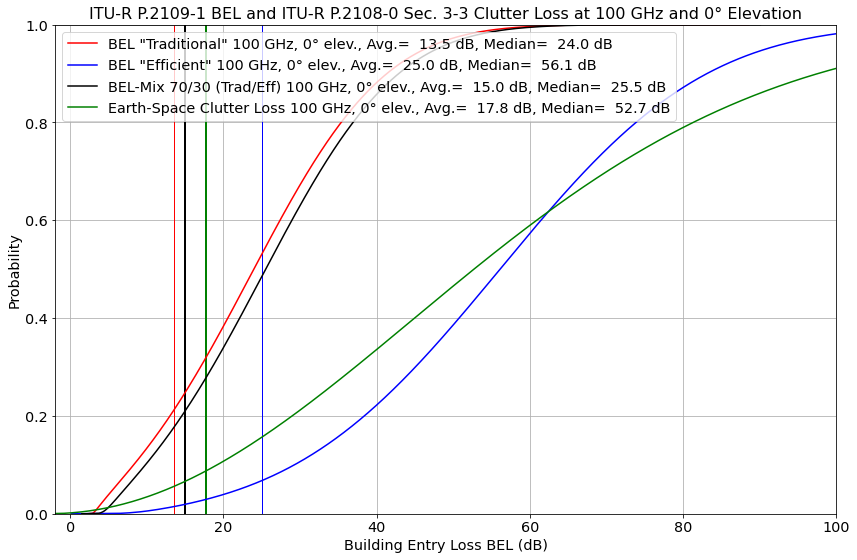

0.0; 13.5; 25.0; 17.8;  0.0;  0.0;  0.0;  0.0;  0.0; 32.7


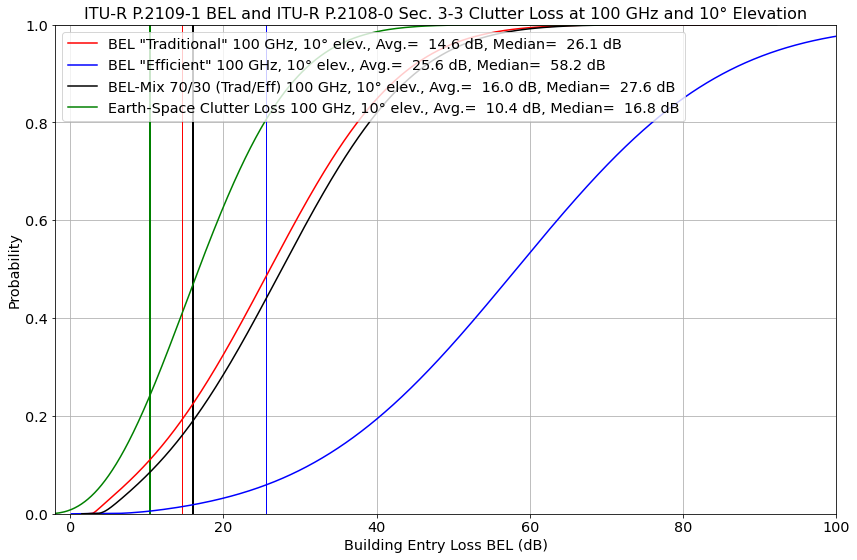

10.0; 14.6; 25.6; 10.4;  0.0;  0.0;  0.0;  0.0;  0.0; 26.4


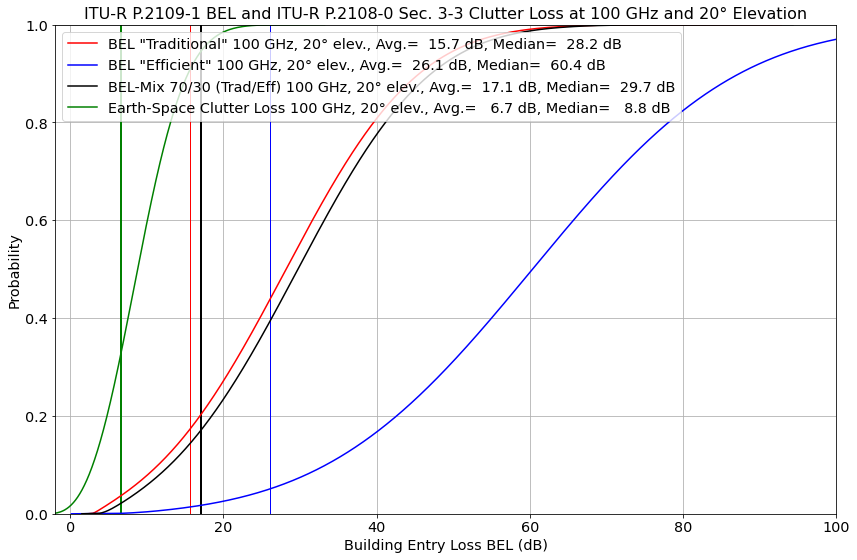

20.0; 15.7; 26.1;  6.7;  0.0;  0.0;  0.0;  0.0;  0.0; 23.8


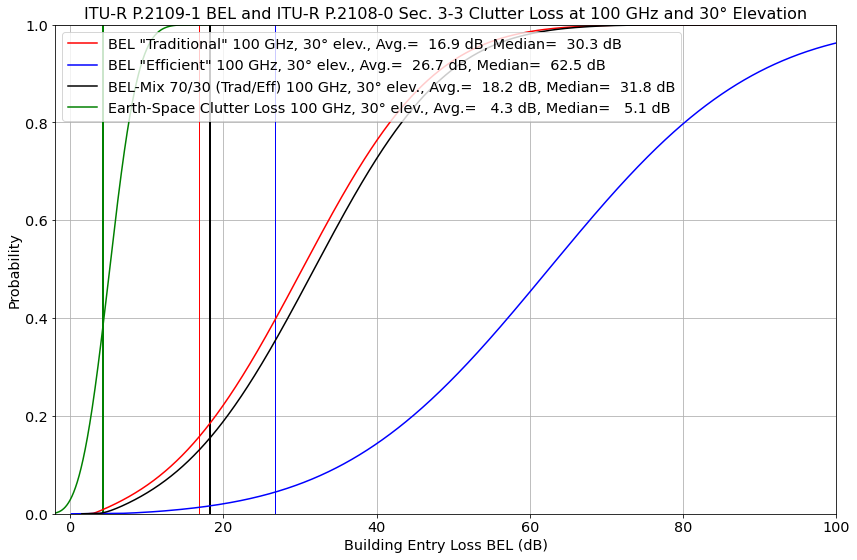

30.0; 16.9; 26.7;  4.3;  0.0;  0.0;  0.0;  0.0;  0.0; 22.5


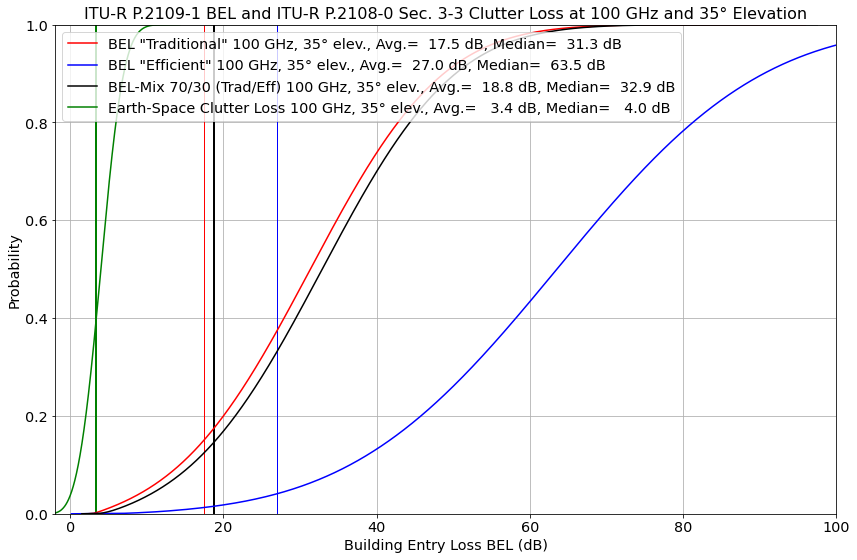

35.0; 17.5; 27.0;  3.4;  0.0;  0.0;  0.0;  0.0;  0.0; 22.2


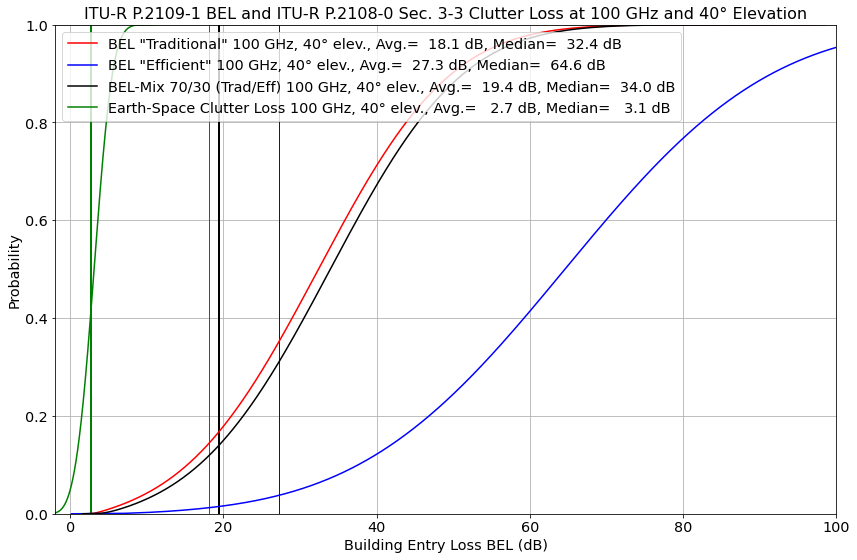

40.0; 18.1; 27.3;  2.7;  0.0;  0.0;  0.0;  0.0;  0.0; 22.1


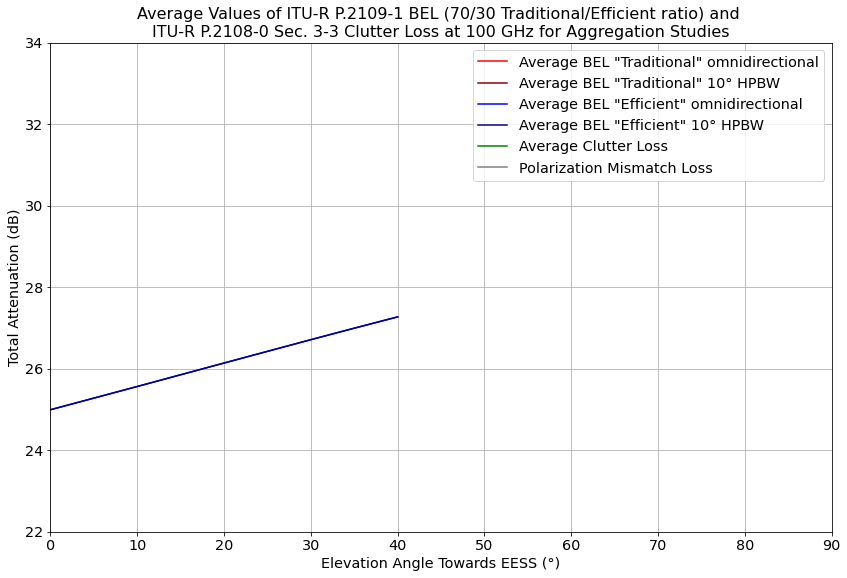

In [29]:
elv_angles=[0, 10, 20, 30, 35, 40]
#elv_angles = np.linspace(0, 90, 91)   # takes a long time, but gives an accurate smooth curve 
antCompLoss=0 #5.3     # Antenna Gain correction (BELomnidirectional to BEL with 10 deg. HPBW)
polCompLoss=0 #3       # Polarization compensation 3dB (TX and RX lin. polarized) 
BELmodelCorrLoss=0  # Optional "lump sum" BEL correction
ReflTransLoss=0     # Optional "lump sum" Reflection / Transmission loss correction
DeviceShielding=0   # Optional "lump sum" evice shielding

BEL_over_ELV_trad = []
BEL_over_ELV_eff = []
CLoss_over_ELV = []
PLoss_over_ELV = []
TotalLoss_over_ELV = []

#plt.close()
#plt.figure(figsize=(14, 9))

for elv_angle in elv_angles:
    _freq = 100                           # Signal frequency in GHz
    #elv_angle = 0                         # Elevation angle of the path at the building facade in degree
    PercentageTraditional = 0.7             # Percentage of traditional building type (0..1, 0.7 is commonly used in aggregate studies)

    #_probab = np.arange(0.0001, 1, 0.0001)
    #_probab = np.linspace(0.000001, 0.999999, 10000)
    _probab = np.linspace(0.000001, 0.999999, 1000)   # increase points for accurate averaging 

    BEL_result_trad = []
    BEL_result_eff = []
    BEL_result_Mix = []
    BEL_result_CL = []
    BEL_result_tradLin = []
    BEL_result_effLin = []
    BEL_result_MixLin = []
    BEL_result_CLlin = []

    for n in range(len(_probab)):
        BEL_result_trad.append(calcBEL(BEL_traditional, _freq, elv_angle, _probab[n]))
        BEL_result_eff.append(calcBEL(BEL_therm_effic, _freq, elv_angle, _probab[n]))
        BEL_result_CL.append(calcClutterLoss(_freq, elv_angle, _probab[n]))
        BEL_result_tradLin.append(np.power(10,(-calcBEL(BEL_traditional, _freq, elv_angle, _probab[n]))/10))
        BEL_result_effLin.append(np.power(10,(-calcBEL(BEL_therm_effic, _freq, elv_angle, _probab[n]))/10))
        BEL_result_CLlin.append(np.power(10,(-calcClutterLoss(_freq, elv_angle, _probab[n]))/10))
        BEL_result_MixLin.append(PercentageTraditional * (np.power(10,(-calcBEL(BEL_traditional, _freq, elv_angle, _probab[n]))/10))+ (1-PercentageTraditional) * (np.power(10,(-calcBEL(BEL_therm_effic, _freq, elv_angle, _probab[n]))/10)))
    
    BEL_result_Mix=-10*np.log10(BEL_result_MixLin)
    BEL_result_mixAvg=-10*np.log10(sum(BEL_result_MixLin) / len(BEL_result_MixLin))
    BEL_result_tradAvg=-10*np.log10(sum(BEL_result_tradLin) / len(BEL_result_tradLin))
    BEL_result_effAvg=-10*np.log10(sum(BEL_result_effLin) / len(BEL_result_effLin))
    BEL_result_CLAvg=-10*np.log10(sum(BEL_result_CLlin) / len(BEL_result_CLlin))
    
    BEL_result_MixMedian=-10*np.log10(PercentageTraditional * (np.power(10,(-calcBEL(BEL_traditional, _freq, elv_angle, 0.5))/10))+ (1-PercentageTraditional) * (np.power(10,(-calcBEL(BEL_therm_effic, _freq, elv_angle, 0.5))/10)))
    BEL_result_tradMedian=calcBEL(BEL_traditional, _freq, elv_angle, 0.5)
    BEL_result_effMedian=calcBEL(BEL_therm_effic, _freq, elv_angle, 0.5)
    BEL_result_CLMedian=calcClutterLoss(_freq, elv_angle, 0.5)
        
    BEL_over_ELV_trad.append(BEL_result_tradAvg)
    BEL_over_ELV_eff.append(BEL_result_effAvg)
    CLoss_over_ELV.append(BEL_result_CLAvg)
    PLoss_over_ELV.append(polCompLoss)
    
    if True:
        plt.close()
        plt.figure(figsize=(14, 9))
        plt.plot(BEL_result_trad, _probab, 'r-', label='BEL "Traditional" %s GHz, %s° elev., Avg.=%6.1f dB, Median=%6.1f dB'% (_freq,elv_angle,BEL_result_tradAvg,BEL_result_tradMedian))
        plt.vlines(BEL_result_tradAvg, 0, 1, linewidth=1, color='r',)
        plt.plot(BEL_result_eff, _probab, 'b-',  label='BEL "Efficient" %s GHz, %s° elev., Avg.=%6.1f dB, Median=%6.1f dB'% (_freq,elv_angle,BEL_result_effAvg,BEL_result_effMedian))
        plt.vlines(BEL_result_effAvg, 0, 1, linewidth=1, color='b',)
        plt.plot(BEL_result_Mix, _probab, 'k-',  label='BEL-Mix 70/30 (Trad/Eff) %s GHz, %s° elev., Avg.=%6.1f dB, Median=%6.1f dB'% (_freq,elv_angle,BEL_result_mixAvg,BEL_result_MixMedian))
        plt.vlines(BEL_result_mixAvg, 0, 1, linewidth=2, color='k',)
        plt.plot(BEL_result_CL, _probab, 'g-', label='Earth-Space Clutter Loss %s GHz, %s° elev., Avg.=%6.1f dB, Median=%6.1f dB'% (_freq,elv_angle,BEL_result_CLAvg,BEL_result_CLMedian))
        plt.vlines(BEL_result_CLAvg, 0, 1, linewidth=2, color='g')


        #plt.pyplot.hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)
        #plt.vlines(calcBELmixGainClutter(useClutter, useAntCorr, antHPBW, PercentageTraditional, frequency, elv_angle,0.5), 0, 1, colors='g', linestyles='solid', label='Median = %*.*f dB'% (6,2,calcBELmixGainClutter(useClutter, useAntCorr, antHPBW, PercentageTraditional, frequency, elv_angle,0.5)))

        plt.xlabel('Building Entry Loss BEL (dB)') 
        plt.ylabel('Probability')
        #plt.semilogx()
        plt.xlim((-2, 100))
        plt.ylim((0, 1))
        plt.grid()
        plt.legend(*plt.gca().get_legend_handles_labels(), loc='upper left')
        plt.title(
            'ITU-R P.2109-1 BEL and ITU-R P.2108-0 Sec. 3-3 Clutter Loss at %s GHz and %s° Elevation' %(_freq, elv_angle),
            fontsize=16
            )

        plt.savefig("fig_BEL_CL_%3.0fGHz_%4.1fdeg.png"% (_freq,elv_angle),dpi=300) # save as png
        plt.show()

    BEL_result_tradAvgSum = BEL_result_tradAvg + BEL_result_CLAvg + antCompLoss + polCompLoss + BELmodelCorrLoss + ReflTransLoss + DeviceShielding 
    BEL_result_effAvgSum = BEL_result_effAvg + BEL_result_CLAvg + antCompLoss + polCompLoss + BELmodelCorrLoss + ReflTransLoss + DeviceShielding
    #BEL_result_tradAvgSum = BEL_result_tradAvg + BEL_result_CLAvg 
    #BEL_result_effAvgSum = BEL_result_effAvg + BEL_result_CLAvg
    
    TradLin=PercentageTraditional*np.power(10,-BEL_result_tradAvgSum/10)
    EffLin=(1-PercentageTraditional)*np.power(10,-BEL_result_effAvgSum/10)
    BEL_result_70_30Avg=-10*np.log10(TradLin+EffLin) 
    TotalLoss_over_ELV.append(BEL_result_70_30Avg)
    #print("Elev: %3.1f°, BEL-Trad: %4.1f dB, BEL-Eff: %4.1f dB, CL: %4.1f dB, Ant-Comp.: %4.1f dB, Pol-Loss: %4.1f dB, BELcorr-Loss: %4.1f dB, ReflTrans-Loss: %4.1f dB, Dev.Shielding: %4.1f dB, 70/30 Total Loss: %4.1f dB"% (elv_angle, BEL_result_tradAvg, BEL_result_effAvg, BEL_result_CLAvg, antCompLoss, polCompLoss, BELmodelCorrLoss, ReflTransLoss, DeviceShielding, BEL_result_70_30Avg))
    print("%3.1f; %4.1f; %4.1f; %4.1f; %4.1f; %4.1f; %4.1f; %4.1f; %4.1f; %4.1f"% (elv_angle, BEL_result_tradAvg, BEL_result_effAvg, BEL_result_CLAvg, antCompLoss, polCompLoss, BELmodelCorrLoss, ReflTransLoss, DeviceShielding, BEL_result_70_30Avg))
BEL_over_ELV_trad_antComp = [i + antCompLoss for i in BEL_over_ELV_trad]
BEL_over_ELV_eff_antComp = [i + antCompLoss for i in BEL_over_ELV_eff]

plt.close()
plt.figure(figsize=(14, 9))
plt.plot(elv_angles, BEL_over_ELV_trad, color='red', label='Average BEL "Traditional" omnidirectional')
plt.plot(elv_angles, BEL_over_ELV_trad_antComp , color='darkred', label='Average BEL "Traditional" 10° HPBW')
plt.plot(elv_angles, BEL_over_ELV_eff, color='blue', label='Average BEL "Efficient" omnidirectional')
plt.plot(elv_angles, BEL_over_ELV_eff_antComp , color='darkblue', label='Average BEL "Efficient" 10° HPBW')
plt.plot(elv_angles, CLoss_over_ELV, 'g-', label='Average Clutter Loss')
plt.plot(elv_angles, PLoss_over_ELV, color='grey', label='Polarization Mismatch Loss')
#plt.plot(elv_angles, TotalLoss_over_ELV, 'k-', linewidth=3, label='Avg. Attenuation: BEL (70/30, omni.-antenna) & Clutter')

plt.xlabel('Elevation Angle Towards EESS (°)') 
plt.ylabel('Total Attenuation (dB)')
plt.xlim((0, 90))
plt.ylim((22, 34))
plt.grid()
plt.legend(*plt.gca().get_legend_handles_labels(), loc='upper right')
plt.title(
    'Average Values of ITU-R P.2109-1 BEL (70/30 Traditional/Efficient ratio) and \nITU-R P.2108-0 Sec. 3-3 Clutter Loss at %s GHz for Aggregation Studies' %(_freq),
    fontsize=16
    )

plt.savefig("fig_Total_ATTN_BEL_CL_%3.0fGHz_over_ELV_Angle.png"% (_freq),dpi=300) # save as png
#plt.show()   

### With additional Losses activated
BELmodelCorrLoss=10 dB 
ReflTransLoss=10 dB    
DeviceShielding=10 dB

Elev: 0.0°, BEL-Trad: 13.6 dB, BEL-Eff: 26.1 dB, CL: 18.1 dB, Ant-Comp.:  5.3 dB, Pol-Loss:  3.0 dB, BELcorr-Loss: 10.0 dB, ReflTrans-Loss: 10.0 dB, Dev.Shielding: 10.0 dB, 70/30 Total Loss: 71.4 dB
Elev: 10.0°, BEL-Trad: 14.6 dB, BEL-Eff: 26.8 dB, CL: 10.4 dB, Ant-Comp.:  5.3 dB, Pol-Loss:  3.0 dB, BELcorr-Loss: 10.0 dB, ReflTrans-Loss: 10.0 dB, Dev.Shielding: 10.0 dB, 70/30 Total Loss: 64.8 dB


KeyboardInterrupt: 

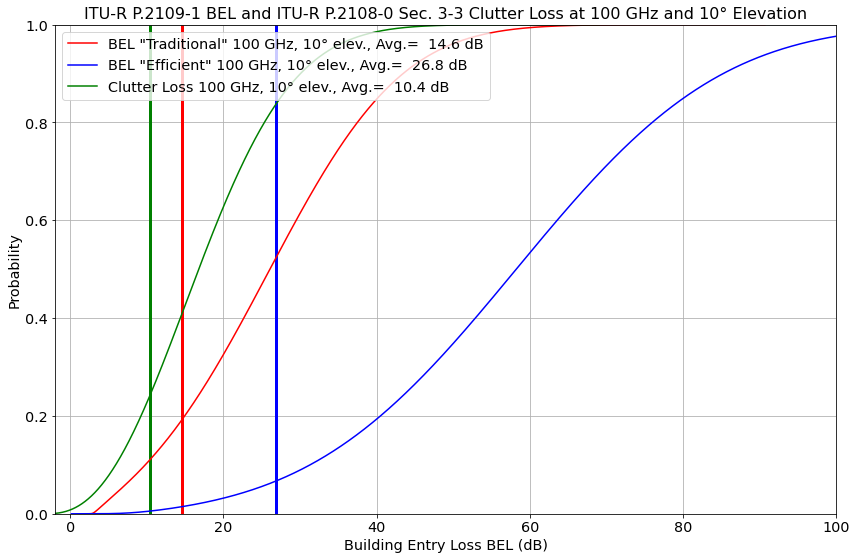

In [8]:
elv_angles=[0, 10, 20, 30, 38, 40, 42, 50, 60, 70, 80, 90]
antCompLoss=5.3     # Antenna Gain correction (BELomnidirectional to BEL with 10 deg. HPBW) [dB]
polCompLoss=3       # Polarization compensation 3dB (TX and RX lin. polarized) [dB]
BELmodelCorrLoss=10  # Optional "lump sum" BEL correction [dB]
ReflTransLoss=10     # Optional "lump sum" Reflection / Transmission loss correction [dB]
DeviceShielding=10   # Optional "lump sum" evice shielding [dB]

#plt.close()
#plt.figure(figsize=(14, 9))

for elv_angle in elv_angles:
    _freq = 100                           # Signal frequency in GHz
    #elv_angle = 0                         # Elevation angle of the path at the building facade in degree
    PercentageTraditional = 0.7             # Percentage of traditional building type (0..1, 0.7 is commonly used in aggregate studies)

    #_probab = np.arange(0.0001, 1, 0.0001)
    _probab = np.linspace(0.000001, 0.999999, 10000)

    BEL_result_trad = []
    BEL_result_eff = []
    BEL_result_CL = []
    BEL_result_tradLin = []
    BEL_result_effLin = []
    BEL_result_CLlin = []

    for n in range(len(_probab)):
        BEL_result_trad.append(calcBEL(BEL_traditional, _freq, elv_angle, _probab[n]))
        BEL_result_eff.append(calcBEL(BEL_therm_effic, _freq, elv_angle, _probab[n]))
        BEL_result_CL.append(calcClutterLoss(_freq, elv_angle, _probab[n]))
        BEL_result_tradLin.append(np.power(10,(-calcBEL(BEL_traditional, _freq, elv_angle, _probab[n]))/10))
        BEL_result_effLin.append(np.power(10,(-calcBEL(BEL_therm_effic, _freq, elv_angle, _probab[n]))/10))
        BEL_result_CLlin.append(np.power(10,(-calcClutterLoss(_freq, elv_angle, _probab[n]))/10))

    BEL_result_tradAvg=-10*np.log10(sum(BEL_result_tradLin) / len(BEL_result_tradLin))
    BEL_result_effAvg=-10*np.log10(sum(BEL_result_effLin) / len(BEL_result_effLin))
    BEL_result_CLAvg=-10*np.log10(sum(BEL_result_CLlin) / len(BEL_result_CLlin))

    plt.close()
    plt.figure(figsize=(14, 9))
    plt.plot(BEL_result_trad, _probab, 'r-', label='BEL "Traditional" %s GHz, %s° elev., Avg.=%6.1f dB'% (_freq,elv_angle,BEL_result_tradAvg))
    plt.vlines(BEL_result_tradAvg, 0, 1, linewidth=3, color='r',)
    plt.plot(BEL_result_eff, _probab, 'b-',  label='BEL "Efficient" %s GHz, %s° elev., Avg.=%6.1f dB'% (_freq,elv_angle,BEL_result_effAvg))
    plt.vlines(BEL_result_effAvg, 0, 1, linewidth=3, color='b',)
    plt.plot(BEL_result_CL, _probab, 'g-', label='Clutter Loss %s GHz, %s° elev., Avg.=%6.1f dB'% (_freq,elv_angle,BEL_result_CLAvg))
    plt.vlines(BEL_result_CLAvg, 0, 1, linewidth=3, color='g')

    #plt.pyplot.hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)
    #plt.vlines(calcBELmixGainClutter(useClutter, useAntCorr, antHPBW, PercentageTraditional, frequency, elv_angle,0.5), 0, 1, colors='g', linestyles='solid', label='Median = %*.*f dB'% (6,2,calcBELmixGainClutter(useClutter, useAntCorr, antHPBW, PercentageTraditional, frequency, elv_angle,0.5)))

    plt.xlabel('Building Entry Loss BEL (dB)') 
    plt.ylabel('Probability')
    #plt.semilogx()
    plt.xlim((-2, 100))
    plt.ylim((0, 1))
    plt.grid()
    plt.legend(*plt.gca().get_legend_handles_labels(), loc='upper left')
    plt.title(
        'ITU-R P.2109-1 BEL and ITU-R P.2108-0 Sec. 3-3 Clutter Loss at %s GHz and %s° Elevation' %(_freq, elv_angle),
        fontsize=16
        )

    #plt.savefig("fig_BEL_CL_%3.0fGHz_%4.1fdeg_addLoss.png"% (_freq,elv_angle),dpi=300) # save as png
    #plt.show()

    BEL_result_tradAvgSum = BEL_result_tradAvg + BEL_result_CLAvg + antCompLoss + polCompLoss + BELmodelCorrLoss + ReflTransLoss + DeviceShielding 
    BEL_result_effAvgSum = BEL_result_effAvg + BEL_result_CLAvg + antCompLoss + polCompLoss + BELmodelCorrLoss + ReflTransLoss + DeviceShielding
    #BEL_result_tradAvgSum = BEL_result_tradAvg + BEL_result_CLAvg 
    #BEL_result_effAvgSum = BEL_result_effAvg + BEL_result_CLAvg
    
    TradLin=PercentageTraditional*np.power(10,-BEL_result_tradAvgSum/10)
    EffLin=(1-PercentageTraditional)*np.power(10,-BEL_result_effAvgSum/10)
    BEL_result_70_30Avg=-10*np.log10(TradLin+EffLin) 
    print("Elev: %3.1f°, BEL-Trad: %4.1f dB, BEL-Eff: %4.1f dB, CL: %4.1f dB, Ant-Comp.: %4.1f dB, Pol-Loss: %4.1f dB, BELcorr-Loss: %4.1f dB, ReflTrans-Loss: %4.1f dB, Dev.Shielding: %4.1f dB, 70/30 Total Loss: %4.1f dB"% (elv_angle, BEL_result_tradAvg, BEL_result_effAvg, BEL_result_CLAvg, antCompLoss, polCompLoss, BELmodelCorrLoss, ReflTransLoss, DeviceShielding, BEL_result_70_30Avg))